## **Performance Comparison of Group Totals Approaches**

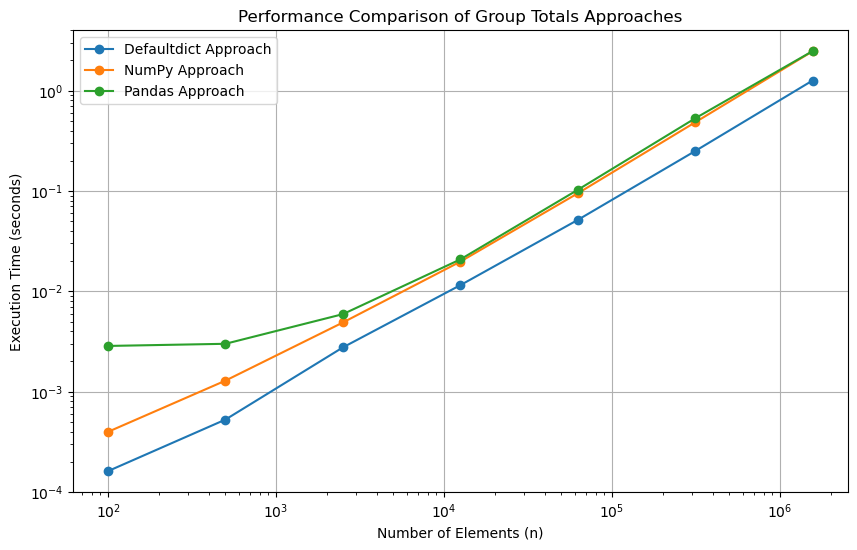

In [3]:
import numpy as np
import pandas as pd
import timeit
import matplotlib.pyplot as plt
from collections import defaultdict

# Approach 1: Using defaultdict
def group_totals_defaultdict(strArr: list[str]) -> str:
    """
    Aggregates values by key using a defaultdict approach.

    Args:
        strArr (list[str]): List of strings in the format "key:value".

    Returns:
        str: A string of aggregated key-value pairs, sorted by key.
    """
    data = defaultdict(int)
    for item in strArr:
        # Check if the item contains exactly one colon and splits into two parts
        if ":" in item and len(item.split(":")) == 2:
            key, value = item.split(":")
            try:
                # Aggregate the values by key
                data[key] += int(value)
            except ValueError:
                # Skip items where the value cannot be converted to an integer
                continue
    # Return the aggregated key-value pairs as a sorted string
    return ",".join(f"{key}:{value}" for key, value in sorted(data.items()))

# Approach 2: Using NumPy
def group_totals_numpy(strArr: list[str]) -> str:
    """
    Aggregates values by key using a NumPy approach.

    Args:
        strArr (list[str]): List of strings in the format "key:value".

    Returns:
        str: A string of aggregated key-value pairs.
    """
    # Filter valid items
    valid_items = [s for s in strArr if s.count(":") == 1 and len(s.split(":")) == 2]
    if not valid_items:
        return ""

    # Split and convert values
    keys, values = zip(*[s.split(":") for s in valid_items])
    values = np.array(list(map(int, values)))
    keys = np.array(keys)

    # Aggregate values by unique keys
    unique_keys = np.unique(keys)
    summed_values = np.array([values[keys == key].sum() for key in unique_keys])

    # Return the aggregated key-value pairs as a string
    return ",".join(f"{key}:{value}" for key, value in zip(unique_keys, summed_values))

# Approach 3: Using pandas
def group_totals_pandas(strArr: list[str]) -> str:
    """
    Aggregates values by key using a pandas DataFrame.

    Args:
        strArr (list[str]): List of strings in the format "key:value".

    Returns:
        str: A string of aggregated key-value pairs.
    """
    # Filter valid items and create DataFrame
    valid_items = [s.split(":") for s in strArr if ":" in s and len(s.split(":")) == 2]
    if not valid_items:
        return ""

    df = pd.DataFrame(valid_items, columns=["key", "value"])
    # Convert 'value' column to integers, handling errors
    df["value"] = pd.to_numeric(df["value"], errors='coerce').fillna(0).astype(int)

    # Group by 'key' and sum the 'value'
    grouped_result = df.groupby("key")["value"].sum()

    # Return the aggregated key-value pairs as a string
    return ",".join(f"{key}:{value}" for key, value in grouped_result.items())

# Test sizes: n increases from 100 to 1,000,000 (increasing by a factor of 5)
test_sizes = [100 * (5 ** i) for i in range(7)]
defaultdict_times: list[float] = []
numpy_times: list[float] = []
pandas_times: list[float] = []

# Performance testing
for n in test_sizes:
    # Generate test data
    keys = np.random.choice(['A', 'B', 'C', 'D'], size=n)
    values = np.random.randint(-100, 100, size=n)
    strArr = [f"{key}:{value}" for key, value in zip(keys, values)]

    # Measure time for each approach
    time_defaultdict = timeit.timeit(lambda: group_totals_defaultdict(strArr), number=3)
    time_numpy = timeit.timeit(lambda: group_totals_numpy(strArr), number=3)
    time_pandas = timeit.timeit(lambda: group_totals_pandas(strArr), number=3)

    # Store the results
    defaultdict_times.append(time_defaultdict)
    numpy_times.append(time_numpy)
    pandas_times.append(time_pandas)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(test_sizes, defaultdict_times, marker='o', label='Defaultdict Approach')
plt.plot(test_sizes, numpy_times, marker='o', label='NumPy Approach')
plt.plot(test_sizes, pandas_times, marker='o', label='Pandas Approach')

# Formatting the plot
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of Elements (n)')
plt.ylabel('Execution Time (seconds)')
plt.title('Performance Comparison of Group Totals Approaches')
plt.legend()
plt.grid(True)
plt.show()


### Why the `defaultdict` Approach is Faster

In the performance comparison, the `defaultdict` approach consistently outperforms both the `NumPy` and `pandas` approaches. Here’s why:

#### 1. **Simpler Data Structure**
- The `defaultdict` approach uses a **basic Python dictionary** to aggregate values, which is efficient for lookups and updates.
- Python dictionaries have an average time complexity of \( O(1) \) for both lookups and inserts due to their underlying hash table implementation.
- The operations in `defaultdict` are straightforward: checking if a key exists, updating the value, and iterating through the list once.

#### 2. **Less Overhead**
- The `defaultdict` approach involves minimal overhead:
  - No external libraries are needed.
  - There are no complex data conversions.
- In contrast, the `NumPy` and `pandas` approaches require converting data types (e.g., strings to integers) and involve additional processing steps like array manipulations, DataFrame creation, and grouping.

#### 3. **Efficient Iteration**
- The `defaultdict` approach processes the input list in a single pass (linear time, \( O(n) \)).
- It updates the dictionary values directly during the iteration, avoiding the need for sorting, unique key extraction, or complex aggregations.

#### 4. **No Vectorized Operations**
- While `NumPy` and `pandas` are designed for vectorized operations, which can be faster for numerical computations, they introduce overhead when dealing with **string processing** and non-numerical data.
- In this task, the input list consists of strings (`"key:value"`), which requires parsing and conversion. Both `NumPy` and `pandas` are less efficient with string operations compared to their optimized numerical operations.

#### 5. **Memory Efficiency**
- The `defaultdict` approach maintains only a simple dictionary with keys and values, making it more memory efficient.
- The `NumPy` approach involves creating multiple arrays, and the `pandas` approach creates a DataFrame, which can be memory-intensive for large datasets.

### Summary of Performance Differences

| Approach       | Time Complexity | Overhead                   | Best Use Case                        |
| -------------- | --------------- | -------------------------- | ------------------------------------ |
| `defaultdict`  | \( O(n) \)      | Minimal                    | Fast for aggregating string-based data |
| `NumPy`        | \( O(n \log n) \) | High (due to string handling) | Fast for numerical, vectorized operations |
| `pandas`       | \( O(n \log n) \) | High (DataFrame creation) | Fast for complex data analysis and manipulation |

### Conclusion
The `defaultdict` approach is well-suited for this problem because:
- It handles string processing efficiently.
- It avoids unnecessary overhead from data conversions and complex operations.
- It operates in a single pass with direct updates, making it the fastest and most memory-efficient choice.

In contrast, `NumPy` and `pandas` shine when working with large numerical datasets that benefit from vectorized operations, but they are less efficient for this type of string aggregation task.

Let me know if you need more details or specific examples!

### Why the `pandas` Approach Starts Slower but Catches Up with `NumPy` for Larger Input Sizes

The performance of the `pandas` approach compared to the `NumPy` approach has a characteristic pattern:

- **For smaller input sizes (below 50,000 elements)**, the `pandas` approach is **slower** than the `NumPy` approach.
- **For larger input sizes (above 50,000 elements)**, the performance of `pandas` becomes similar to or even slightly better than the `NumPy` approach.

Let’s break down the reasons for this behavior.

#### 1. **Initial Overhead of `pandas` DataFrame Creation**
- In the `pandas` approach, a **DataFrame** is created from the list of strings. This involves:
  - Parsing the input data (`split(":")` operation).
  - Allocating memory for a DataFrame, which is more complex than a simple NumPy array.
  - Converting values to integers using `pd.to_numeric()`.
- This initial setup incurs a **significant overhead**, especially for smaller datasets. The extra time spent on DataFrame creation outweighs the benefits of `pandas`' optimized operations.

#### 2. **Efficient Grouping and Aggregation with Larger Datasets**
- `pandas` is designed for **data manipulation and analysis**, with efficient algorithms for operations like grouping and aggregation.
- As the dataset size increases, the overhead of DataFrame creation becomes less significant compared to the time spent on aggregation.
- `pandas` uses highly optimized C and C++ back-end code for `groupby()` operations, which scales well with large datasets.

#### 3. **`NumPy` Limitations with String Data**
- `NumPy` excels with numerical data but is less efficient with string processing. In this problem:
  - `NumPy` first handles the splitting and conversion of strings to integers.
  - It then uses Boolean indexing (`values[keys == key]`) for aggregation, which can become inefficient as the dataset grows due to repeated filtering operations.
- For smaller datasets, the simplicity of `NumPy` operations makes it faster, but as the dataset grows, the repeated indexing operations become a bottleneck.

#### 4. **Optimized Data Handling in `pandas`**
- `pandas` is optimized for handling large datasets with complex operations like `groupby()` and aggregation.
- Once the initial DataFrame creation overhead is amortized (i.e., spread out over a larger dataset), `pandas`' efficient grouping and aggregation can match or exceed the performance of `NumPy`.

### Summary of the Performance Shift
| Input Size     | Faster Approach | Reason                                          |
| -------------- | --------------- | ----------------------------------------------- |
| Small (<50,000) | `NumPy`        | Lower overhead, faster string processing        |
| Large (>50,000) | `pandas`       | Efficient `groupby()` aggregation, less indexing overhead |

### Conclusion
The `pandas` approach starts slower due to the initial overhead of DataFrame creation and string-to-integer conversion. However, as the input size increases, `pandas`' efficient aggregation algorithms make it competitive with or better than `NumPy`, especially for complex data operations.

In summary, `pandas` is slower for small datasets because of its setup cost, but its performance scales better for larger datasets due to optimized backend algorithms.